Mounted at /content/drive
✅ Libraries imported successfully
🔧 PyTorch: 2.8.0+cu126, CUDA: True

📦 EXTRACTING FAKEAVCELEB DATASET
⏳ Extracting...
✅ Extracted in 127.3 seconds
✅ Config loaded: cuda, Batch Size: 96

📂 LOCATING VIDEOS
Real: 500, Fake: 20544

🔧 LOADING TRANSFORMER MODEL
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 215MB/s]


✅ Model loaded from: /content/drive/MyDrive/PTHs/transformer_v1_best.pth

🚀 RUNNING 5-SEED EVALUATION

🎲 SEED: 42
Samples: 500 real + 3000 fake = 3500 total


Seed 42: 100%|██████████| 37/37 [16:46<00:00, 27.19s/it]



✅ Seed 42 Results:
   Accuracy:  0.6214 (62.14%)
   AUC:       0.6280 (62.80%)
   Precision: 0.8930
   Recall:    0.6343
   F1-Score:  0.7418
   Processed: 3500/3500

🎲 SEED: 123
Samples: 500 real + 3000 fake = 3500 total


Seed 123: 100%|██████████| 37/37 [16:32<00:00, 26.81s/it]



✅ Seed 123 Results:
   Accuracy:  0.6109 (61.09%)
   AUC:       0.6214 (62.14%)
   Precision: 0.8911
   Recall:    0.6220
   F1-Score:  0.7326
   Processed: 3500/3500

🎲 SEED: 456
Samples: 500 real + 3000 fake = 3500 total


Seed 456: 100%|██████████| 37/37 [16:31<00:00, 26.78s/it]



✅ Seed 456 Results:
   Accuracy:  0.6160 (61.60%)
   AUC:       0.6243 (62.43%)
   Precision: 0.8920
   Recall:    0.6280
   F1-Score:  0.7371
   Processed: 3500/3500

🎲 SEED: 789
Samples: 500 real + 3000 fake = 3500 total


Seed 789: 100%|██████████| 37/37 [16:27<00:00, 26.70s/it]



✅ Seed 789 Results:
   Accuracy:  0.6297 (62.97%)
   AUC:       0.6353 (63.53%)
   Precision: 0.8944
   Recall:    0.6440
   F1-Score:  0.7488
   Processed: 3500/3500

🎲 SEED: 2024
Samples: 500 real + 3000 fake = 3500 total


Seed 2024: 100%|██████████| 37/37 [16:33<00:00, 26.85s/it]



✅ Seed 2024 Results:
   Accuracy:  0.6140 (61.40%)
   AUC:       0.6251 (62.51%)
   Precision: 0.8917
   Recall:    0.6257
   F1-Score:  0.7354
   Processed: 3500/3500

📊 TRANSFORMER V1: STATISTICAL ANALYSIS (5 RUNS)

📈 Summary Statistics:
   Metric     Mean      Std      Min      Max
 Accuracy 0.618400 0.007403 0.610857 0.629714
      AUC 0.626816 0.005273 0.621375 0.635255
Precision 0.892460 0.001305 0.891117 0.894444
   Recall 0.630800 0.008636 0.622000 0.644000
 F1-Score 0.739135 0.006361 0.732627 0.748837

⏱️  Total time: 82.85 minutes
⏱️  Avg per run: 16.57 minutes

📋 DETAILED RESULTS PER SEED
 seed  accuracy      auc  precision   recall  f1_score
   42  0.621429 0.627991   0.893008 0.634333  0.741766
  123  0.610857 0.621375   0.891117 0.622000  0.732627
  456  0.616000 0.624323   0.892045 0.628000  0.737089
  789  0.629714 0.635255   0.894444 0.644000  0.748837
 2024  0.614000 0.625138   0.891686 0.625667  0.735357

✅ Results saved:
   📄 /content/transformer_v1_fakeavceleb_5ru

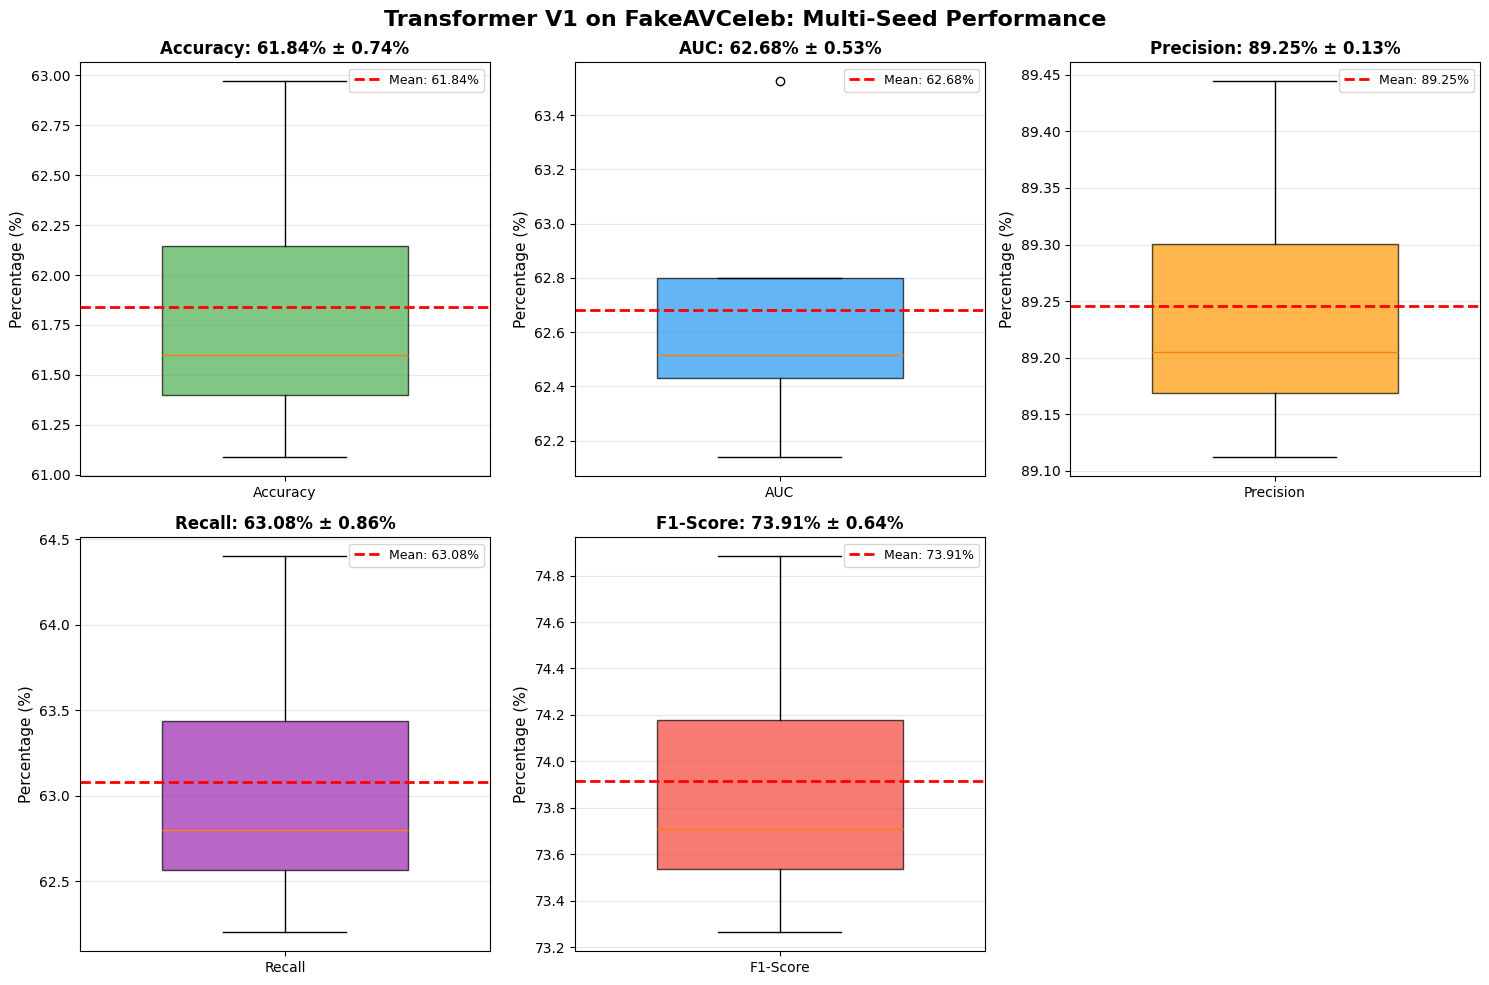

✅ Visualization saved: /content/transformer_v1_fakeavceleb_5runs_boxplot.png

🎉 TRANSFORMER V1 CROSS-DATASET EVALUATION COMPLETED!

📝 SUMMARY FOR THESIS:

The Transformer V1 model (trained on AVLips) was evaluated on FakeAVCeleb
across 5 different random seeds (42, 123, 456, 789, 2024).
Each evaluation used 500 real and 3000 fake videos.

Accuracy    : 61.84% ± 0.74%
AUC         : 62.68% ± 0.53%
Precision   : 89.25% ± 0.13%
Recall      : 63.08% ± 0.86%
F1-Score    : 73.91% ± 0.64%

Total evaluation time: 82.8 minutes


In [1]:
# -*- coding: utf-8 -*-

"""
TRANSFORMER V1: 5-SEED CROSS-DATASET EVALUATION ON FAKEAVCELEB
Evaluates pre-trained Transformer model across 5 random seeds
Extracts audio directly from video files (FakeAVCeleb format)
Optimized for Google Colab Pro
"""

# ============================================================================
# STEP 1: MOUNT DRIVE & IMPORTS
# ============================================================================

from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import time
import torch
import zipfile
import librosa
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
from tqdm import tqdm
import torchvision.models as models
from torch.cuda.amp import autocast
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
torch.backends.cudnn.benchmark = True
print("✅ Libraries imported successfully")
print(f"🔧 PyTorch: {torch.__version__}, CUDA: {torch.cuda.is_available()}")

# ============================================================================
# STEP 2: EXTRACT FAKEAVCELEB DATASET
# ============================================================================

print("\n" + "="*80)
print("📦 EXTRACTING FAKEAVCELEB DATASET")
print("="*80)

zip_path = '/content/drive/MyDrive/CSE400 codes - 144/archive.zip'  # UPDATE IF NEEDED
extract_path = '/content/FakeAVCeleb'

if not os.path.exists(extract_path):
    print(f"⏳ Extracting...")
    start_time = time.time()
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extracted in {time.time()-start_time:.1f} seconds")
else:
    print(f"✅ Already extracted")

# ============================================================================
# STEP 3: CONFIGURATION
# ============================================================================

class Config:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Visual Stream
        self.vis_image_size = (128, 128)
        self.vis_num_frames = 16
        self.vis_cnn_feature_dim = 576
        self.vis_transformer_d_model = 256
        self.vis_transformer_nhead = 8
        self.vis_transformer_layers = 4
        self.vis_transformer_dropout = 0.1

        # Audio Stream
        self.aud_sample_rate = 16000
        self.aud_num_chunks = 5
        self.aud_chunk_duration = 1.0
        self.aud_n_mels = 128
        self.aud_cnn_feature_dim = 576
        self.aud_transformer_d_model = 256
        self.aud_transformer_nhead = 8
        self.aud_transformer_layers = 4
        self.aud_transformer_dropout = 0.1

        # Inference (OPTIMIZED FOR COLAB PRO)
        self.batch_size = 96  # High batch size for fast evaluation
        self.num_workers = 2

config = Config()
print(f"✅ Config loaded: {config.device}, Batch Size: {config.batch_size}")

# ============================================================================
# STEP 4: DATA PROCESSING (FACE DETECTION + AUDIO FROM VIDEO)
# ============================================================================

def process_visual_with_face_detection(video_path: str, config: Config):
    """Extract visual frames with face detection (matches training)"""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < config.vis_num_frames:
        cap.release()
        return None

    frame_indices = np.linspace(0, total_frames - 1, config.vis_num_frames, dtype=int)
    frames = []
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for i in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            continue

        # Face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

        if len(faces) > 0:
            # Get largest face and extract mouth region
            (x, y, w, h) = max(faces, key=lambda rect: rect[2] * rect[3])
            mouth_y_start = y + int(h * 0.6)
            mouth_y_end = y + h
            mouth_x_start = x + int(w * 0.25)
            mouth_x_end = x + int(w * 0.75)

            mouth_crop = frame[mouth_y_start:mouth_y_end, mouth_x_start:mouth_x_end]

            if mouth_crop.size > 0:
                resized_crop = cv2.resize(mouth_crop, config.vis_image_size)
                resized_crop_rgb = cv2.cvtColor(resized_crop, cv2.COLOR_BGR2RGB)
                frames.append(resized_crop_rgb)
            else:
                # Fallback: center crop
                h, w = frame.shape[:2]
                crop_size = min(h, w)
                start_h = (h - crop_size) // 2
                start_w = (w - crop_size) // 2
                cropped = frame[start_h:start_h+crop_size, start_w:start_w+crop_size]
                resized = cv2.resize(cropped, config.vis_image_size)
                resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
                frames.append(resized_rgb)
        else:
            # Fallback: center crop
            h, w = frame.shape[:2]
            crop_size = min(h, w)
            start_h = (h - crop_size) // 2
            start_w = (w - crop_size) // 2
            cropped = frame[start_h:start_h+crop_size, start_w:start_w+crop_size]
            resized = cv2.resize(cropped, config.vis_image_size)
            resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
            frames.append(resized_rgb)

    cap.release()
    return np.stack(frames) if len(frames) == config.vis_num_frames else None

def process_audio_from_video(video_path: str, config: Config):
    """Extract audio directly from video file"""
    try:
        y, sr = librosa.load(video_path, sr=config.aud_sample_rate, duration=5.0, mono=True)

        target_length = int(config.aud_sample_rate * config.aud_chunk_duration * config.aud_num_chunks)
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)), mode='constant')
        else:
            y = y[:target_length]

        samples_per_chunk = int(config.aud_chunk_duration * sr)
        mel_spectrograms = []

        for i in range(config.aud_num_chunks):
            chunk = y[i*samples_per_chunk : (i+1)*samples_per_chunk]
            mel = librosa.feature.melspectrogram(
                y=chunk, sr=sr, n_mels=config.aud_n_mels,
                n_fft=2048, hop_length=512, fmax=8000
            )
            mel_db = librosa.power_to_db(mel, ref=np.max)
            mel_mean = mel_db.mean()
            mel_std = mel_db.std()
            if mel_std > 1e-8:
                mel_normalized = (mel_db - mel_mean) / mel_std
            else:
                mel_normalized = mel_db - mel_mean

            mel_spectrograms.append(torch.tensor(mel_normalized, dtype=torch.float32))

        return torch.stack(mel_spectrograms, dim=0)

    except Exception:
        return None

# ============================================================================
# STEP 5: DATASET CLASS
# ============================================================================

class FakeAVCelebDataset(Dataset):
    def __init__(self, video_paths, labels, config):
        self.video_paths = video_paths
        self.labels = labels
        self.config = config
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        try:
            visual_frames = process_visual_with_face_detection(self.video_paths[idx], self.config)
            if visual_frames is None:
                return None

            visual_tensors = [self.transform(frame) for frame in visual_frames]
            visual_tensor = torch.stack(visual_tensors, dim=0)

            audio_mels = process_audio_from_video(self.video_paths[idx], self.config)
            if audio_mels is None:
                return None

            return visual_tensor, audio_mels.unsqueeze(1), torch.tensor(self.labels[idx], dtype=torch.float32)
        except Exception:
            return None

def collate_fn(batch):
    batch = [x for x in batch if x is not None]
    return torch.utils.data.dataloader.default_collate(batch) if batch else None

# ============================================================================
# STEP 6: TRANSFORMER MODEL ARCHITECTURE
# ============================================================================

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, max_len: int = 5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len, _ = x.shape
        return x + self.pe[:seq_len, :].unsqueeze(0).expand(batch_size, -1, -1)

class VisualStream_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
        self.cnn_features = mobilenet.features
        self.avgpool = mobilenet.avgpool
        self.proj = nn.Linear(config.vis_cnn_feature_dim, config.vis_transformer_d_model)
        self.proj_dropout = nn.Dropout(0.3)
        self.pos_encoding = PositionalEncoding(config.vis_transformer_d_model, max_len=config.vis_num_frames)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=config.vis_transformer_d_model, nhead=config.vis_transformer_nhead,
            dim_feedforward=config.vis_transformer_d_model * 4, dropout=config.vis_transformer_dropout,
            batch_first=True, norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, config.vis_transformer_layers)
        self.layer_norm = nn.LayerNorm(config.vis_transformer_d_model)
        self.out_dim = config.vis_transformer_d_model

    def forward(self, x):
        b, t, c, h, w = x.shape
        x = x.view(b * t, c, h, w)
        features = self.avgpool(self.cnn_features(x)).view(b, t, -1)
        projected = self.proj_dropout(self.proj(features))
        encoded = self.pos_encoding(projected)
        transformer_out = self.transformer(encoded)
        return self.layer_norm(transformer_out[:, -1, :])

class AudioStream_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
        self.cnn_features = mobilenet.features
        self.avgpool = mobilenet.avgpool
        self.proj = nn.Linear(config.aud_cnn_feature_dim, config.aud_transformer_d_model)
        self.proj_dropout = nn.Dropout(0.3)
        self.pos_encoding = PositionalEncoding(config.aud_transformer_d_model, max_len=config.aud_num_chunks)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=config.aud_transformer_d_model, nhead=config.aud_transformer_nhead,
            dim_feedforward=config.aud_transformer_d_model * 4, dropout=config.aud_transformer_dropout,
            batch_first=True, norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, config.aud_transformer_layers)
        self.layer_norm = nn.LayerNorm(config.aud_transformer_d_model)
        self.out_dim = config.aud_transformer_d_model

    def forward(self, x):
        b, t, c, h, w = x.shape
        x = x.view(b * t, c, h, w).repeat(1, 3, 1, 1)
        features = self.avgpool(self.cnn_features(x)).view(b, t, -1)
        projected = self.proj_dropout(self.proj(features))
        encoded = self.pos_encoding(projected)
        transformer_out = self.transformer(encoded)
        return self.layer_norm(transformer_out[:, -1, :])

class FusionModel_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.visual_stream = VisualStream_Transformer(config)
        self.audio_stream = AudioStream_Transformer(config)
        fusion_input_dim = self.visual_stream.out_dim + self.audio_stream.out_dim
        self.fusion_head = nn.Sequential(
            nn.Linear(fusion_input_dim, 256), nn.ReLU(), nn.Dropout(0.6), nn.Linear(256, 1)
        )

    def forward(self, visual_input, audio_input):
        visual_features = self.visual_stream(visual_input)
        audio_features = self.audio_stream(audio_input)
        return self.fusion_head(torch.cat((visual_features, audio_features), dim=1))

# ============================================================================
# STEP 7: FIND VIDEOS
# ============================================================================

print("\n" + "="*80)
print("📂 LOCATING VIDEOS")
print("="*80)

def find_videos(root_dir):
    videos = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.mp4', '.avi', '.mov')):
                videos.append(os.path.join(root, file))
    return videos

all_videos = find_videos(extract_path)
real_videos = [v for v in all_videos if 'RealVideo-RealAudio' in v]
fake_videos = [v for v in all_videos if 'FakeVideo' in v or ('fake' in v.lower() and 'RealVideo' not in v)]

print(f"Real: {len(real_videos)}, Fake: {len(fake_videos)}")

# ============================================================================
# STEP 8: LOAD TRANSFORMER MODEL
# ============================================================================

print("\n" + "="*80)
print("🔧 LOADING TRANSFORMER MODEL")
print("="*80)

# ⚠️ UPDATE THIS PATH TO YOUR TRANSFORMER .PTH FILE ⚠️
model_path = '/content/drive/MyDrive/PTHs/transformer_v1_best.pth'

model = FusionModel_Transformer(config).to(config.device)
model.load_state_dict(torch.load(model_path, map_location=config.device))
model.eval()

# Disable dropout for inference
for m in model.modules():
    if isinstance(m, nn.Dropout):
        m.p = 0.0

print(f"✅ Model loaded from: {model_path}")

# ============================================================================
# STEP 9: EVALUATION FUNCTION (SINGLE SEED)
# ============================================================================

def evaluate_seed(seed, real_vids, fake_vids, model, config):
    print(f"\n{'='*80}")
    print(f"🎲 SEED: {seed}")
    print(f"{'='*80}")

    np.random.seed(seed)
    torch.manual_seed(seed)

    # Sample videos
    real_sample = np.random.choice(real_vids, min(500, len(real_vids)), replace=False).tolist()
    fake_sample = np.random.choice(fake_vids, min(3000, len(fake_vids)), replace=False).tolist()

    test_videos = real_sample + fake_sample
    test_labels = [0]*len(real_sample) + [1]*len(fake_sample)

    print(f"Samples: {len(real_sample)} real + {len(fake_sample)} fake = {len(test_videos)} total")

    # Create dataset and dataloader
    dataset = FakeAVCelebDataset(test_videos, test_labels, config)
    loader = DataLoader(
        dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        collate_fn=collate_fn,
        pin_memory=True
    )

    all_preds = []
    all_labels_collected = []

    # Inference
    with torch.no_grad():
        for batch in tqdm(loader, desc=f"Seed {seed}"):
            if batch is None:
                continue

            visual, audio, labels = batch
            visual = visual.to(config.device)
            audio = audio.to(config.device)

            with autocast():
                outputs = model(visual, audio)
                probs = torch.sigmoid(outputs)

            all_preds.extend(probs.cpu().numpy())
            all_labels_collected.extend(labels.numpy())

    if len(all_preds) < 10:
        print(f"❌ Too few predictions: {len(all_preds)}")
        return None

    all_preds = np.array(all_preds).flatten()
    all_labels_collected = np.array(all_labels_collected).flatten()

    # Filter NaN
    valid_mask = ~np.isnan(all_preds)
    nan_count = (~valid_mask).sum()

    if nan_count > 0:
        print(f"⚠️  Warning: {nan_count} NaN predictions out of {len(all_preds)}")

    all_preds = all_preds[valid_mask]
    all_labels_collected = all_labels_collected[valid_mask]

    if len(all_preds) < 10:
        print(f"❌ Too many NaN: only {len(all_preds)} valid predictions")
        return None

    pred_binary = (all_preds > 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(all_labels_collected, pred_binary)
    auc = roc_auc_score(all_labels_collected, all_preds)
    cm = confusion_matrix(all_labels_collected, pred_binary)

    tn, fp, fn, tp = cm.ravel()
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

    print(f"\n✅ Seed {seed} Results:")
    print(f"   Accuracy:  {acc:.4f} ({acc*100:.2f}%)")
    print(f"   AUC:       {auc:.4f} ({auc*100:.2f}%)")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall:    {rec:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   Processed: {len(all_preds)}/{len(test_videos)}")

    return {
        'seed': seed,
        'accuracy': acc,
        'auc': auc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'processed': len(all_preds),
        'confusion_matrix': cm
    }

# ============================================================================
# STEP 10: RUN 5 SEEDS
# ============================================================================

print("\n" + "="*80)
print("🚀 RUNNING 5-SEED EVALUATION")
print("="*80)

seeds = [42, 123, 456, 789, 2024]
results = []

start_time = time.time()

for seed in seeds:
    result = evaluate_seed(seed, real_videos, fake_videos, model, config)
    if result:
        results.append(result)
    else:
        print(f"⚠️  Skipping seed {seed} due to insufficient data")

total_time = time.time() - start_time

# ============================================================================
# STEP 11: COMPILE STATISTICS
# ============================================================================

if len(results) == 0:
    print("\n❌ NO VALID RESULTS - ALL SEEDS FAILED")
else:
    df = pd.DataFrame(results)

    print("\n" + "="*80)
    print("📊 TRANSFORMER V1: STATISTICAL ANALYSIS (5 RUNS)")
    print("="*80)

    stats = {
        'Metric': ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score'],
        'Mean': [
            df['accuracy'].mean(),
            df['auc'].mean(),
            df['precision'].mean(),
            df['recall'].mean(),
            df['f1_score'].mean()
        ],
        'Std': [
            df['accuracy'].std(),
            df['auc'].std(),
            df['precision'].std(),
            df['recall'].std(),
            df['f1_score'].std()
        ],
        'Min': [
            df['accuracy'].min(),
            df['auc'].min(),
            df['precision'].min(),
            df['recall'].min(),
            df['f1_score'].min()
        ],
        'Max': [
            df['accuracy'].max(),
            df['auc'].max(),
            df['precision'].max(),
            df['recall'].max(),
            df['f1_score'].max()
        ]
    }

    stats_df = pd.DataFrame(stats)

    print("\n📈 Summary Statistics:")
    print(stats_df.to_string(index=False))

    print(f"\n⏱️  Total time: {total_time/60:.2f} minutes")
    print(f"⏱️  Avg per run: {total_time/len(results)/60:.2f} minutes")

    print("\n" + "="*80)
    print("📋 DETAILED RESULTS PER SEED")
    print("="*80)
    detailed = df[['seed', 'accuracy', 'auc', 'precision', 'recall', 'f1_score']]
    print(detailed.to_string(index=False))

    # Save results
    df.to_csv('/content/transformer_v1_fakeavceleb_5runs_detailed.csv', index=False)
    stats_df.to_csv('/content/transformer_v1_fakeavceleb_5runs_statistics.csv', index=False)

    # Paper format
    paper_format = []
    for _, row in stats_df.iterrows():
        paper_format.append({
            'Metric': row['Metric'],
            'Result': f"{row['Mean']*100:.2f}% ± {row['Std']*100:.2f}%"
        })
    paper_df = pd.DataFrame(paper_format)
    paper_df.to_csv('/content/transformer_v1_fakeavceleb_5runs_paper_format.csv', index=False)

    print("\n✅ Results saved:")
    print("   📄 /content/transformer_v1_fakeavceleb_5runs_detailed.csv")
    print("   📄 /content/transformer_v1_fakeavceleb_5runs_statistics.csv")
    print("   📄 /content/transformer_v1_fakeavceleb_5runs_paper_format.csv")

    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Transformer V1 on FakeAVCeleb: Multi-Seed Performance', fontsize=16, fontweight='bold')

    metrics = ['accuracy', 'auc', 'precision', 'recall', 'f1_score']
    titles = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score']
    colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#F44336']

    for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
        ax = axes[idx // 3, idx % 3]
        values = df[metric] * 100

        bp = ax.boxplot([values], labels=[title], patch_artist=True, widths=0.6)
        bp['boxes'][0].set_facecolor(color)
        bp['boxes'][0].set_alpha(0.7)

        mean_val = values.mean()
        ax.axhline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')

        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_title(f'{title}: {mean_val:.2f}% ± {values.std():.2f}%', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.legend(fontsize=9)

    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.savefig('/content/transformer_v1_fakeavceleb_5runs_boxplot.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✅ Visualization saved: /content/transformer_v1_fakeavceleb_5runs_boxplot.png")

    # Final summary
    print("\n" + "="*80)
    print("🎉 TRANSFORMER V1 CROSS-DATASET EVALUATION COMPLETED!")
    print("="*80)
    print(f"\n📝 SUMMARY FOR THESIS:\n")
    print(f"The Transformer V1 model (trained on AVLips) was evaluated on FakeAVCeleb")
    print(f"across 5 different random seeds (42, 123, 456, 789, 2024).")
    print(f"Each evaluation used 500 real and 3000 fake videos.\n")

    for metric, mean_val, std_val in zip(stats_df['Metric'], stats_df['Mean'], stats_df['Std']):
        print(f"{metric:12s}: {mean_val*100:5.2f}% ± {std_val*100:4.2f}%")

    print(f"\nTotal evaluation time: {total_time/60:.1f} minutes")
    print("="*80)
